- 고객군집분석
    - 실제 온라인 리테일 자료로 군집분석을 해서 고객별 분류를 한다.

In [110]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samantas2020/online-retail-xlsx")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\samantas2020\online-retail-xlsx\versions\1


In [111]:
retail_df = pd.read_excel('data/Online Retail.xlsx')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [112]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


```
- InvoiceNo 송장 번호:
    - 송장 번호. 명목 번호. 각 거래에 고유하게 할당되는 6자리 정수입니다. 이 코드가 'c'로 시작하면 취소를 나타냅니다.

- StockCode 재고 코드:
    - 제품(품목) 코드. 명목상 번호. 각 제품에 고유하게 할당되는 5자리 정수입니다.

- Description 설명:
    - 제품(품목)명. 명목명.

- Quantity 수량:
    - 거래당 각 제품(품목)의 수량. 숫자 형식.

- InvoiceDate 송장 날짜:
    - 송장 날짜 및 시간. 숫자. 거래가 발생한 날짜와 시간입니다.

- UnitPrice 단가:
    - 단가. 숫자. 제품 단위당 가격(파운드).

- CustomerID 고객 ID:
    - 고객 번호. 명목 번호. 각 고객에게 고유하게 부여되는 5자리 정수입니다.

- Country 국가:
    - 국가명. 명목상. 고객이 거주하는 국가의 이름입니다.

```

In [113]:
retail_df.info()    # retail_df 정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [114]:
print(retail_df.isnull().sum())
print(retail_df.isna().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [115]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


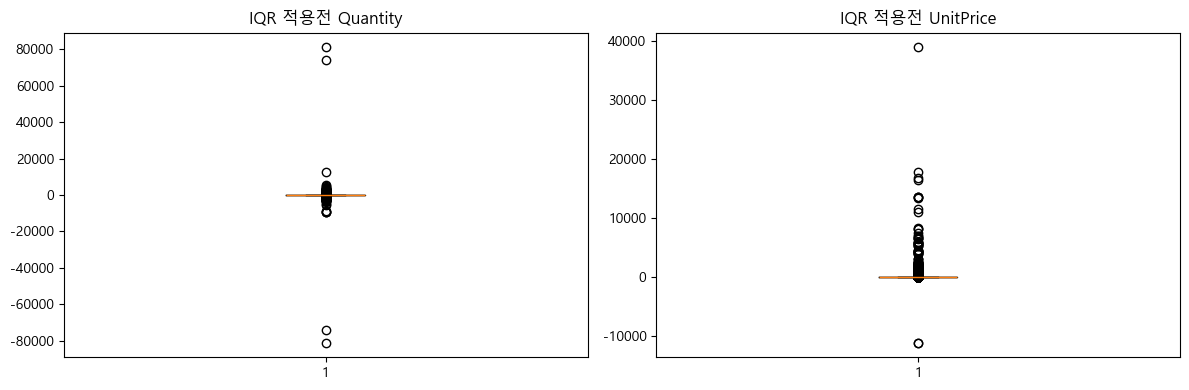

In [116]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.boxplot(retail_df['Quantity'])
plt.title('IQR 적용전 Quantity')

plt.subplot(1,2,2)
plt.boxplot(retail_df['UnitPrice'])
plt.title('IQR 적용전 UnitPrice')

plt.tight_layout()
plt.show()

In [117]:

retail_df = retail_df.dropna()      # 결측치 제거

# IQR 방식으로 이상치 제거하는 함수
def remove_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR 
    
    return df[(df[column] >= lower) & (df[column] <= upper) & (df[column]> 0)]


retail_df = remove_outlier_iqr(retail_df, 'Quantity')
retail_df = remove_outlier_iqr(retail_df, 'UnitPrice')
retail_df = remove_outlier_iqr(retail_df, 'UnitPrice')  #두번 적용 해서 이상치 없앰#

retail_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


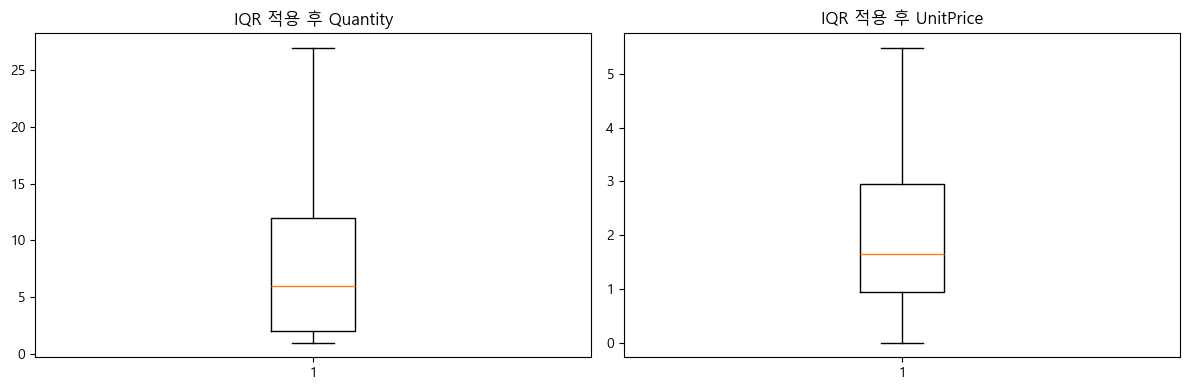

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.boxplot(retail_df['Quantity'])
plt.title('IQR 적용 후 Quantity')

plt.subplot(1,2,2)
plt.boxplot(retail_df['UnitPrice'])
plt.title('IQR 적용 후 UnitPrice')

plt.tight_layout()
plt.show()

In [119]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,322735.000000,322735,322735.000000,322735.000000
mean,7.652384,2011-07-13 03:26:11.194447360,1.996179,15328.603102
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-08 12:06:00,0.950000,13993.000000
50%,6.000000,2011-08-04 10:23:00,1.650000,15252.000000
75%,12.000000,2011-10-23 15:47:00,2.950000,16834.000000
max,27.000000,2011-12-09 12:50:00,5.490000,18287.000000
std,6.828802,NaN,1.283600,1713.248770


In [120]:
retail_df['Country'].unique()   # 거래가 발생한 국가 목록

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Finland', 'Austria', 'Sweden', 'Netherlands',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [121]:
retail_df['Country'].value_counts()         # 국가별 거래 건수 분포

Country
United Kingdom          291082
Germany                   7219
France                    6706
EIRE                      5098
Spain                     1964
Belgium                   1622
Switzerland               1391
Portugal                  1223
Norway                     723
Netherlands                586
Italy                      575
Channel Islands            512
Finland                    496
Australia                  459
Cyprus                     458
Austria                    327
Denmark                    293
Sweden                     246
Poland                     239
Unspecified                200
Israel                     184
Iceland                    164
USA                        159
Singapore                  129
Canada                     124
Greece                     106
Japan                      106
Malta                       88
United Arab Emirates        58
RSA                         45
European Community          43
Lebanon                     27


In [122]:
# 수량과 단가를 곱해서 거래금액 컬럼 생성, 고객  ID는 정수형으로 변환
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [123]:
# 어떤 고객이 가장 많이 샀을까? (고객ID로 그루핑하고 sale_amount를 sum해주고, 내림차순으로 정렬)
retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)


CustomerID
14911    77797.93
13089    32964.48
17841    29324.32
14096    27211.04
14298    23848.93
           ...   
16738        3.75
14101        2.95
16446        2.90
17942        1.90
12755        1.65
Name: sale_amount, Length: 4178, dtype: float64

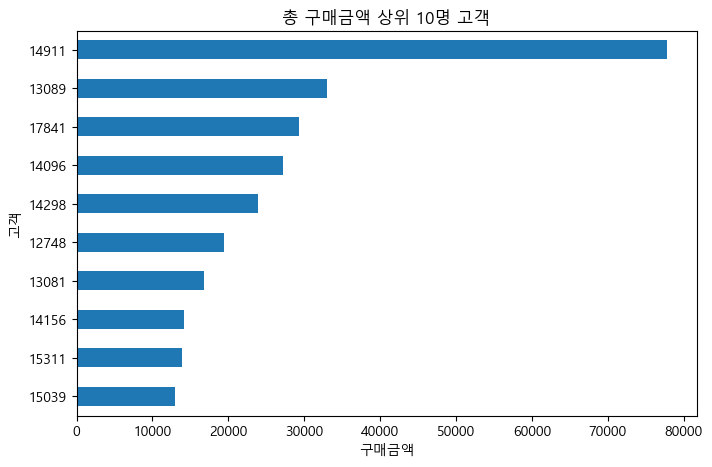

In [124]:
# 가장 많이 구매한 고객 상위 10명
top10 = (retail_df.groupby('CustomerID')['sale_amount']
         .sum()
         .sort_values(ascending=False)      # 구매 금액 기준 내림차순 정렬
         .head(10)                          # 상위 10명
         .sort_values()                     # 시각화를 위해 상위10명에서 오름차순 재정렬
)
plt.figure(figsize=(8,5))
top10.plot(kind='barh')
plt.title('총 구매금액 상위 10명 고객')
plt.xlabel('구매금액')
plt.ylabel('고객')
plt.show()

In [125]:
# 상위 10% 고객이 차지하는 매출 비중 계산
customer_sales = retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)
total_customer = customer_sales.shape[0]
top_10_percet_cnt = int(total_customer * 0.1)
top_10_percet_cnt

top_10_sales = customer_sales.iloc[:top_10_percet_cnt].sum()

total_sales = customer_sales.sum()  # 전체 매출

top_10_ratio = (top_10_sales / total_sales) * 100
print(f"상위 10% 고객이 차지하는 매출 비중 : {top_10_ratio:.1f}%")



상위 10% 고객이 차지하는 매출 비중 : 46.8%


### 상위 10% 고객이 매출의 거의 절반을 차지할만큼 소수 고객에게 매출이 집중되어있다.

In [126]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [127]:
# 고객 ID를 기준으로 각종 데이터를 집계
aggregation = {
    'sale_amount': 'sum',       # 고객별 총 구매금액 
    'InvoiceNo': 'count',       # 고객별 구매 횟수
    'InvoiceDate': 'max'        # 고객의 마지막 구매일자
}

cust_df = retail_df.groupby('CustomerID').agg(aggregation)    # 고객 단위로
cust_df

,sale_amount,InvoiceNo,InvoiceDate
CustomerID,,,
12347,3243.33,164,2011-12-07 15:52:00
12348,90.20,6,2011-04-05 10:47:00
12349,918.10,53,2011-11-21 09:51:00
12350,294.40,16,2011-02-02 16:01:00
12352,986.34,59,2011-11-03 14:37:00
...,...,...,...
18280,119.15,7,2011-03-07 09:52:00
18281,46.92,5,2011-06-12 10:53:00
18282,99.63,7,2011-12-02 11:43:00


In [128]:
# 기준일자를 설정하고, 기준일자(데이터의 마지막일자 +1일) 기준 최근 구매일로부터 경과한 일수를 숫자 데이터로 변환해 계산
import datetime as dt
cust_df['InvoiceDate'] = dt.datetime(2011,12,10) - cust_df['InvoiceDate']   # 일자로 변환
cust_df

,sale_amount,InvoiceNo,InvoiceDate
CustomerID,,,
12347,3243.33,164,2 days 08:08:00
12348,90.20,6,248 days 13:13:00
12349,918.10,53,18 days 14:09:00
12350,294.40,16,310 days 07:59:00
12352,986.34,59,36 days 09:23:00
...,...,...,...
18280,119.15,7,277 days 14:08:00
18281,46.92,5,180 days 13:07:00
18282,99.63,7,7 days 12:17:00


In [129]:
# 최근 구매 경과시간을 일 단위로 변환하여 인공지능 모델링에 사용 가능하게 만듦
cust_df['InvoiceDate'] = cust_df['InvoiceDate'].dt.days # 일시 -> 일자(day)로 변경
cust_df

,sale_amount,InvoiceNo,InvoiceDate
CustomerID,,,
12347,3243.33,164,2
12348,90.20,6,248
12349,918.10,53,18
12350,294.40,16,310
12352,986.34,59,36
...,...,...,...
18280,119.15,7,277
18281,46.92,5,180
18282,99.63,7,7


In [130]:
# 스케일링 
from sklearn.preprocessing import StandardScaler                    # 평균 0, 표준편차1로 스케일링 해주는 도구
from sklearn.cluster import KMeans                                  # 군집화 모델
from sklearn.metrics import silhouette_samples, silhouette_score    # 군집 품질 평가 도구

In [131]:
scaled_data = StandardScaler().fit_transform(cust_df)
scaled_data


array([[ 1.16145391,  0.44897777, -0.9015811 ],
       [-0.43156305, -0.36872199,  1.55971649],
       [-0.01329335, -0.12548219, -0.74149671],
       ...,
       [-0.42679884, -0.36354668, -0.85155473],
       [ 0.55355076,  3.48171234, -0.89157583],
       [ 0.00825924, -0.14100813, -0.50137011]], shape=(4178, 3))

In [167]:
# 군집 분포 확인
kmeans = KMeans(
    n_clusters=4,   # 군집 갯수
    random_state=0  # 시드 고정 재현성 확보
)

kmeans.fit(scaled_data)     # 군집 학습
kmeans.labels_              # 군집 할당 결과

array([1, 0, 2, ..., 2, 1, 2], shape=(4178,), dtype=int32)

In [168]:
# cust_df의 clsuter 컬럼에 파생 변수를 만들어 군집 할당 결과를 저장
cust_df['cluster'] = kmeans.labels_
cust_df


,sale_amount,InvoiceNo,InvoiceDate,cluster
CustomerID,,,,
12347,3243.33,164,2,1
12348,90.20,6,248,0
12349,918.10,53,18,2
12350,294.40,16,310,0
12352,986.34,59,36,2
...,...,...,...,...
18280,119.15,7,277,0
18281,46.92,5,180,0
18282,99.63,7,7,2


In [169]:
silhouette_score(
    scaled_data,        # 스케일된 입력 데이터
    kmeans.labels_      # 군집 라벨
)


0.5877998172998126

- 실루엣 계수가 0.5로 나쁘진 않다.
    - 낮을 경우에는 군집수 조정
    - dbscan.gmm 등의 다룬 군집 알고리즘으로 변경해본다.